<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool10_StatisticalData/blob/main/DATA07_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 시계열분석 

>## 1) 시계열 분석 개념
>- 시간에 따라 측정된 데이터
>- 순차적인 관측값들로 이루어진 데이터

>## 2) 시계열 데이터 특징
>- 시간의존성(Time Dependency) : 시간에 따라 변화하는 경향 / 데이터간의 시간적 연관성 존재
>- 계절성 : 일정한 주기, 반복된 패턴 가능
>- 추세 : 장기적 추세 존재 가능 / 시간에 따라 증가 및 감소 패턴있음
>- 자기상관성 : 시간적 인접값 사이 상관관계 있을 수 잇음
>- 불규칙성 : 외부요인 및 잡음에 의한 불규칙성 발생가능

>## 3) 시계열 특성 실습 : 추세, 계절성, 자기상관성 분석 

>>### (1) 1000개의 랜덤 시계열 데이터 생성 후 데이터프레임에 저장

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

#시계열데이터생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#데이터프레임을 CSV파일로 저장
data.to_csv('sample_time_data.csv', index=False)

#저장한 CSV파일 읽기
data = pd.read_csv('sample_time_data.csv', parse_dates=['Date'], index_col='Date')

#데이터확인
print(data)

               Value
Date                
2023-01-01  0.496714
2023-01-02 -0.138264
2023-01-03  0.647689
2023-01-04  1.523030
2023-01-05 -0.234153
...              ...
2025-09-22 -0.281100
2025-09-23  1.797687
2025-09-24  0.640843
2025-09-25 -0.571179
2025-09-26  0.572583

[1000 rows x 1 columns]


>>### (2) 시계열 데이터 분석
>>- 시계열 데이터를 선그래프로 시각화
>>- x축 : 날짜(시간)
>>- y축 : 날짜의 값

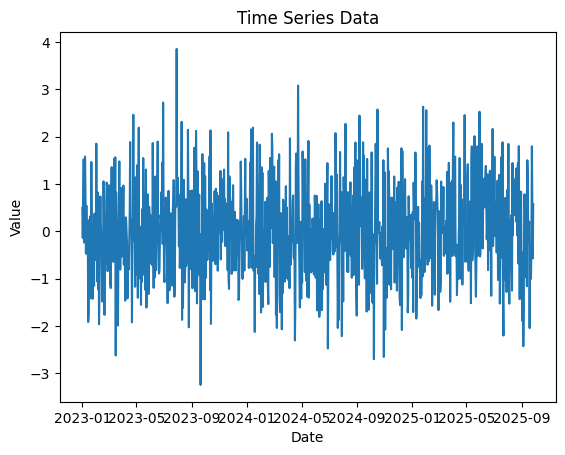

In [3]:
#시계열 데이터 시각화
plt.plot(data.index, data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

>>### (3) 추세분석 
>>- 계절성 분해 수행 및 결과 시각화
>>- 계절성 분해 : 주어진 시계열 데이터를 추세, 계절성, 잔차(Residual) 성분으로 분해하는 과정
>>- additive 모델 : 계절성 분해 모델 중 하나로 추세+계절성+잔차로 표현 / 계절성이 시간에 비례하여 일정하게 변하는 경우에 적합함
>>- multiplicative : 계절성이 시간에 비례하여 증가/감소하는 경우 사용

>>>#### ① 추세분석 : 기본 실습 

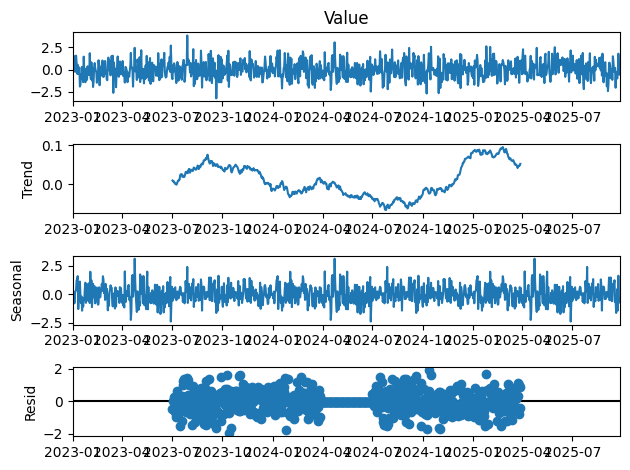

In [4]:
#추세분석
result = seasonal_decompose(data['Value'], model='additive', period=365)
result.plot()
plt.show()

#원본데이터
#추세성분 : 장기적 변동패턴
#계절성성분 : 365일 주기
#잔차성분 : 계절성 제외 나머지 변동요소

>>>#### ② 추세분석 : 상향추세
>>>- 시간변화에 따라 점진적 증가 추세
>>>- 긍정적 경향 : 경제성장, 매출증가

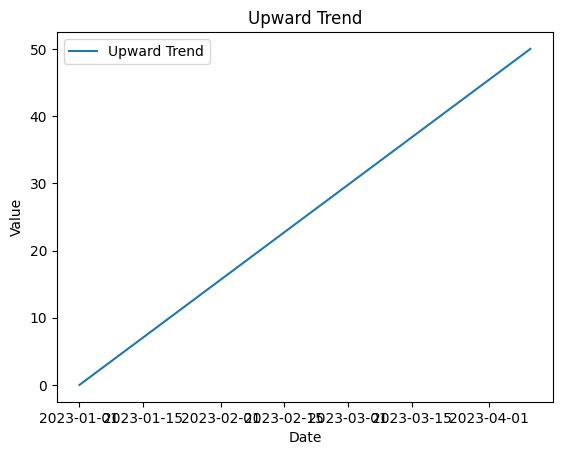

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#랜덤 시계열 100개 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq ='D')
values = np.random.randn(100).cumsum()

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Values':values})


#상향추세 시각화

#상향추세 생성
data['Upward_Trend'] = np.linspace(0, 50, len(data))

plt.plot(data['Date'], data['Upward_Trend'], label='Upward Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Upward Trend')
plt.legend()
plt.show()

>>>#### ③ 추세분석 : 하향추세
>>>- 시간에 따라 점진적으로 감소하는 추세
>>>- 부정적인 경향 : 경기하락, 판매량 감소

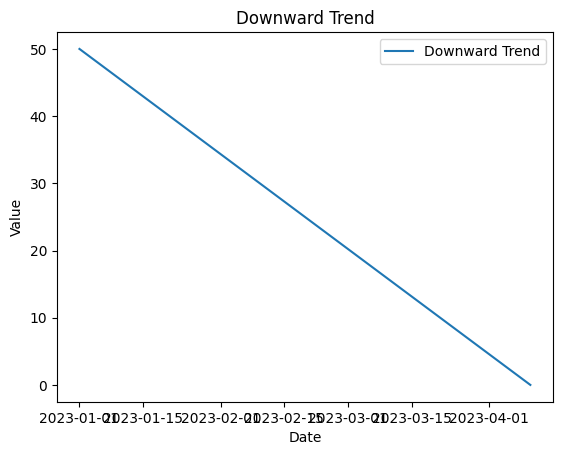

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#랜덤 시계열 100개 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq ='D')
values = np.random.randn(100).cumsum()

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Values':values})


#하향추세 시각화

#하향추세 생성
data['Downward_Trend'] = np.linspace(50, 0, len(data))

plt.plot(data['Date'], data['Downward_Trend'], label='Downward Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Downward Trend')
plt.legend()
plt.show()

>>>#### ④ 추세분석 : 평평한 추세
>>>- 시간 지남에 따라 변동 없이 일정한 수준 유지
>>>- 안정적인 상태 : 가격, 생산성 유지

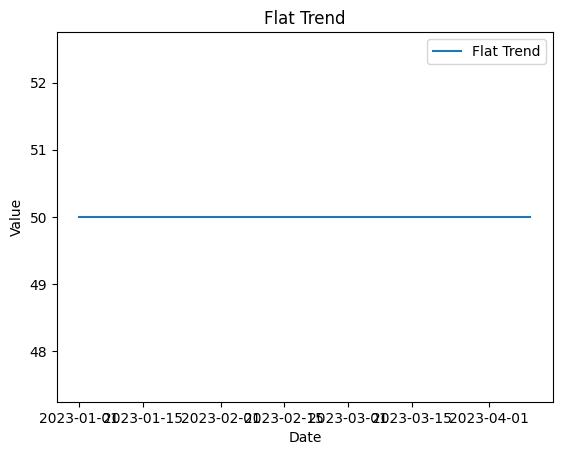

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#랜덤 시계열 100개 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq ='D')
values = np.random.randn(100).cumsum()

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Value':values})


#평평한추세 시각화

#평평한추세 생성
data['Flat_Trend'] = np.full(len(data), 50)

plt.plot(data['Date'], data['Flat_Trend'], label='Flat Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Flat Trend')
plt.legend()
plt.show()

>>### (4) 계절성분석
>>- 계절성 성분은 주기적으로 반복되는 패턴을 나타냄
>>- 데이터의 특정 기간별 패턴 보여줌
>>- x축 : 날짜
>>- y축 : 계절성 성분의 값

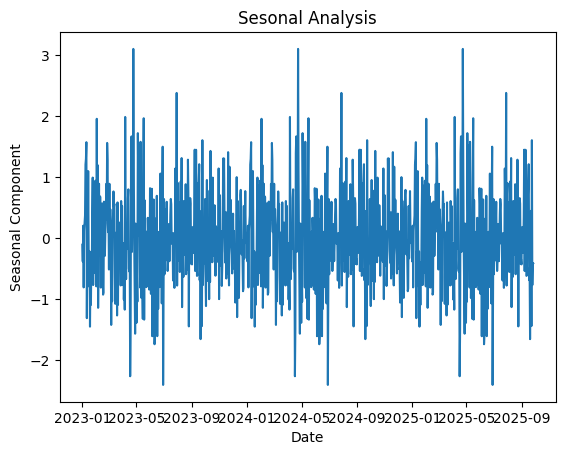

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#랜덤 시계열 100개 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq ='D')
values = np.random.randn(100).cumsum()

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Value':values})


#계절성분석
seasonal_component = result.seasonal
plt.plot(seasonal_component)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Sesonal Analysis')
plt.show()

>>### (5) 자기상관성 분석
>>- 시계열 데이터의 자기상관성
>>- x축 : lag(시차)
>>- y축 : 자기상관성 값
>>- ACF 그래프 : 시가 증가에 따른 자기 상관성 변화 보여줌
>>- ACF 값 음수 : 음의 상관성
>>- ACF 값 양수 : 양의 상관성

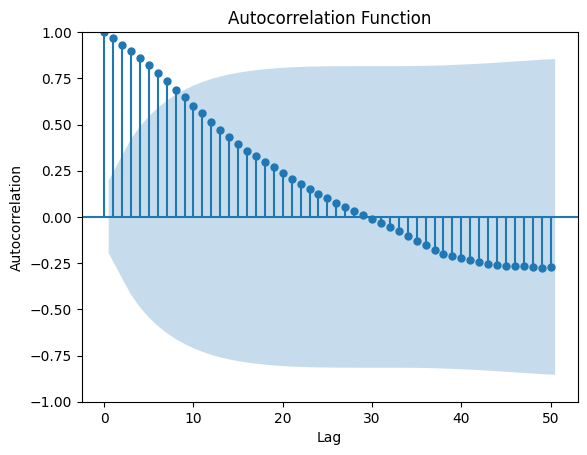

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#랜덤 시계열 100개 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq ='D')
values = np.random.randn(100).cumsum()

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Value':values})


#자기상관성 분석
plot_acf(data['Value'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

>## 4) 시계열 데이터 분석 중요성
>- 예측 및 추세분석 : 과거 패턴 동향 분석 후 미래 값 예측
>- 의사 결정 지원
>- 이상 탐지
>- 자원할당 및 계획
>- 인과관계 파악 가능

>## 5) 시계열 분석 활용 분야
>- 금융 : 주가예측, 자산가치평가, 금융리스크모델링
>- 수요예측 : 제품주요예측, 재고관리, 고객수요분석
>- 자연재해 예측 : 기상데이터 이용해서 자연재해 예측 가능
>- 건강관리 : 의료기록 및 생체신호 데이터 분석 후 질병예측, 치료효과 평가
>- 에너지 예측 및 최적화
>- 교통 및 운송 분석
>- 경제 분석 
>- 환경모니터링

>## 6) 시계열분석 기법소개
>- 이동평균 : 주어진 기간의 평균 계산하여 데이터 추세 파악
>- 지수평활법 : 이동평균 사용하여 추세 예측방법
>- ARIMA : 자기회귀누적이동평균, 시계열 데이터의 자기상관성 모델링하여 예측
>- SARIMA : ARIMA+계절성 -> 계절적 시계열 데이터 예측 방법
>- Prophet : 트렌드, 계절성, 휴일효과 모델링 하여 예측
>- LSTM : 딥러닝 모델, 장기의존성 가진 시계열 데이터 예측
>- VAR : 다변량 시계열 데이터 사용되는 모델로 다른 변수 사이의 상관관계 모델링하여 예측

---

# 2. 시계열 데이터 탐색 및 시각화

>## 1) 시계열 데이터 변동패턴
>- 추세 : 데이터가 일정한 방향으로 증가 및 감소하는 경향
>- 계절성 : 주기적 패턴이 존재함
>- 주기 : 장기적인 주기성 관찰
>- 불규칙성 : 예외적 사건이나 임시적 변동

>## 2) 시계열 데이터 변동성
>- 분산 : 데이터값 퍼짐도 / 분산 클수록 멀리퍼져 있음
>- 표준편차 : 분산 제곱근 / 클수록 평균에서 상대적으로 멀리퍼진 것
>- 변동계수 : 상대적 변동 정도 나타내는 지표

>## 3) 시계열 데이터 시각화 기법

>>### (1) 선그래프(Line Plot) 
>>- 가장 기본적인 시계열 데이터 시각화 방법
>>- 시간에 따른 데이터 변화를 선으로 연결하여 보여줌
>>- x축 : 시간
>>- y축 : 데이터값

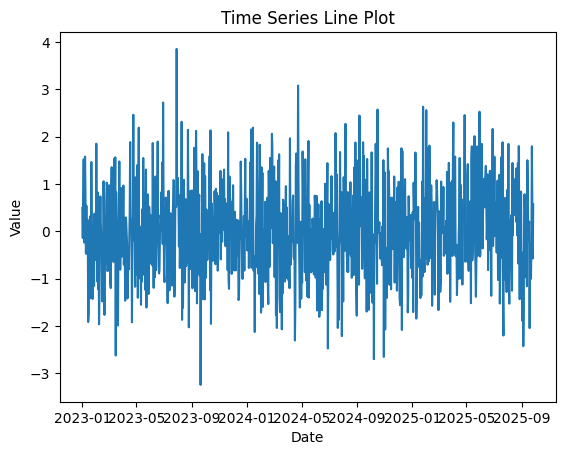

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Line Plot')
plt.show()

>>### (2) 산점도 그래프(Scatter Plot)
>>- 데이터 분포를 점으로 나타내는 그래프

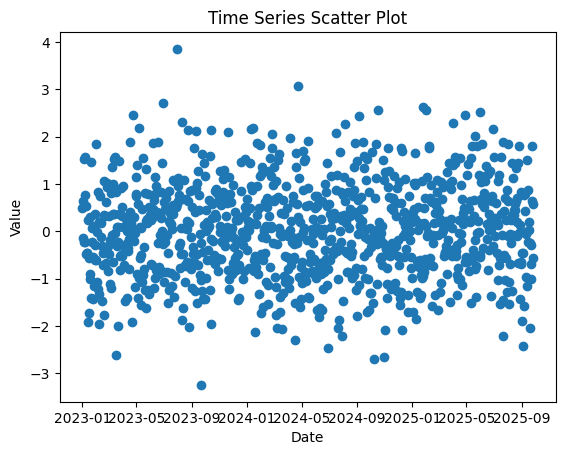

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#시계열 데이터 산점도 그래프
plt.scatter(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Scatter Plot')
plt.show()

>>### (3) 막대그래프(Bar Plot)
>>- 데이터값을 막대로 나타냄

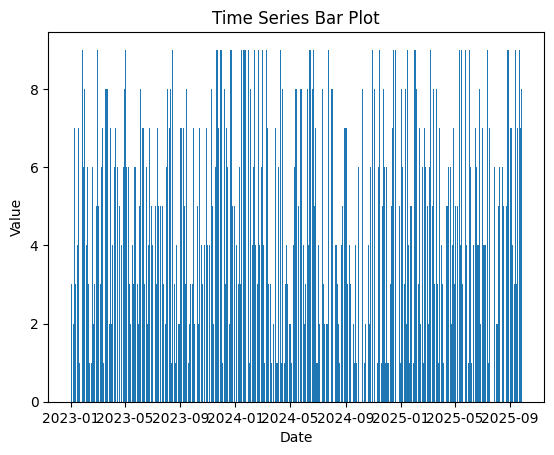

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randint(0, 10, size=1000)

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#시계열 데이터 산점도 그래프
plt.bar(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Bar Plot')
plt.show()

>>### (4) 박스플롯(Box Plot) 
>>- 데이터 분포 및 이상치 확인 그래프
>>- 중앙값, 사분위수, 이상치를 시각적으로 나타냄

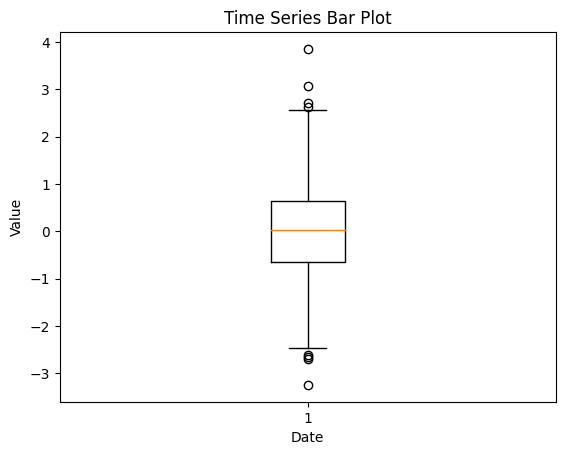

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#시계열 데이터 산점도 그래프
plt.boxplot(data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Bar Plot')
plt.show()

>>### (5) 히스토그램(Histogram)
>>- 데이터의 분포를 막대로 표현
>>- 데이터값의 빈도표현 할때 사용

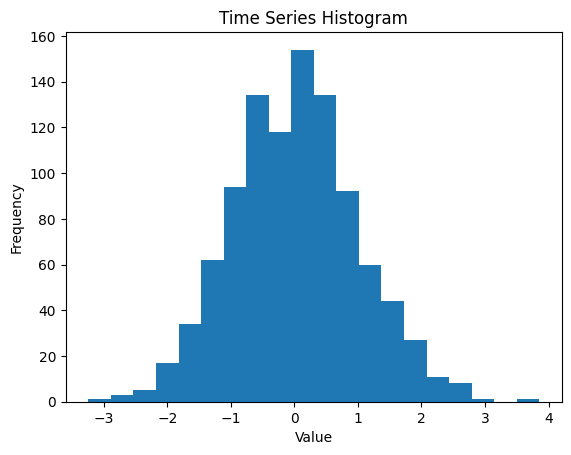

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#시계열 데이터 산점도 그래프
plt.hist(data['Value'], bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Time Series Histogram')
plt.show()

>>### (6) 히트맵(Heatmap) 
>>- 시간과 다른 변수(요일, 시간대)에 따른 데이터값을 색상으로 나타냄
>>- 여러가지 변수의 상호작용 및 패턴확인
>>- 데이터를 2차원으로 변환 필요
>>- x축 : 시간
>>- y축 : 특성이나 변수

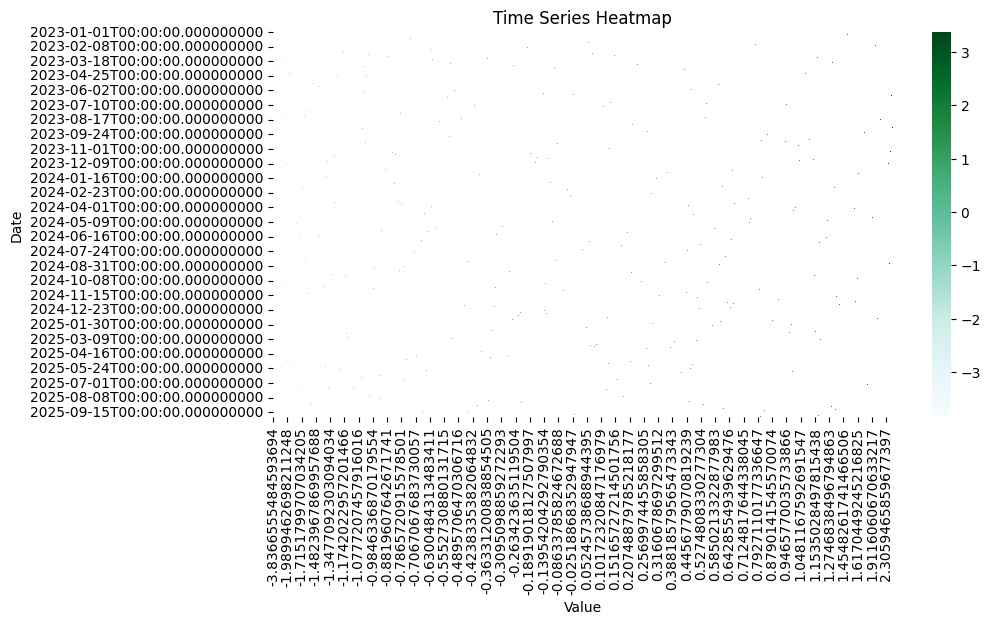

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#데이터를 피벗테이블로 변환(2차원화)
pivot_table = data.pivot(index='Date', columns='Value', values='Value')

#시계열 데이터 산점도 그래프
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, cmap='BuGn', cbar=True)
plt.xlabel('Value')
plt.ylabel('Date')
plt.title('Time Series Heatmap')
plt.show()

>>### (6) 시계열분해
>>- 추세, 계절성, 주기, 불규칙성 요소를 분리하여 시각적으로 나타냄
>>- 시계열 데이터의 구성요소 파악하고 분석하는데 도움

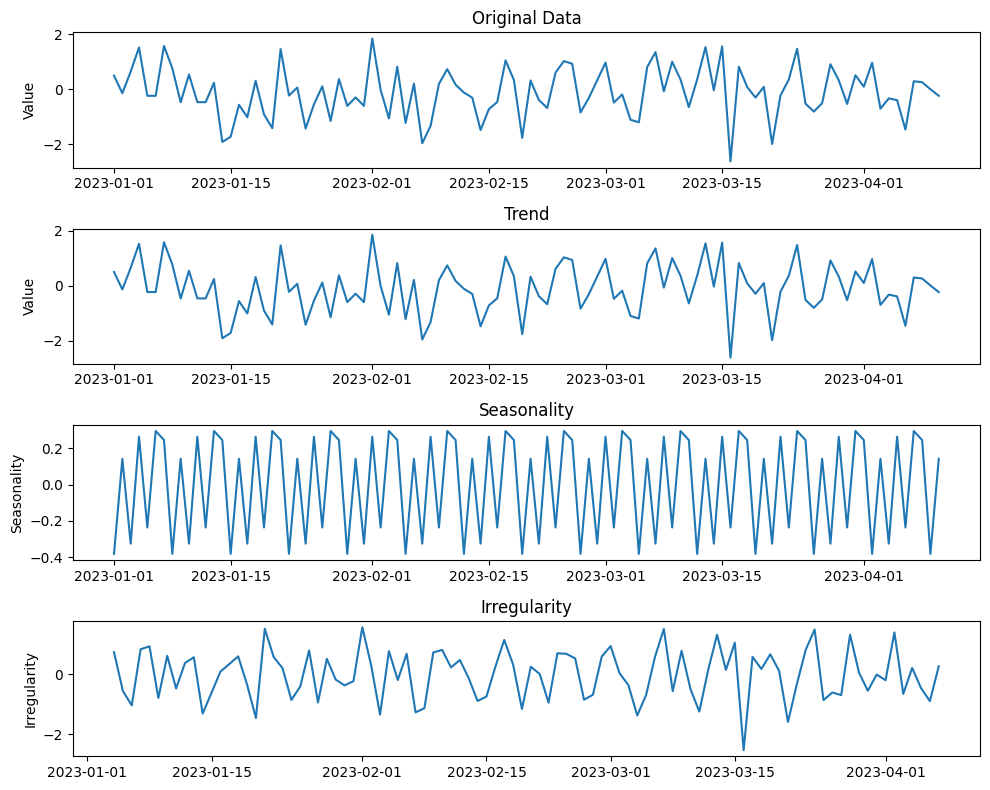

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#시계열분해
result = seasonal_decompose(data['Value'], model='additive', period=7)

#시계열 데이터 산점도 그래프
plt.figure(figsize=(10,8))

#원본데이터
plt.subplot(4, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.title('Original Data')
plt.ylabel('Value')

#추세(Trend)
plt.subplot(4, 1, 2)
plt.plot(data['Date'], data['Value'])
plt.title('Trend')
plt.ylabel('Value')

#계절성
plt.subplot(4, 1, 3)
plt.plot(data['Date'], result.seasonal)
plt.title('Seasonality')
plt.ylabel('Seasonality')

#불규칙성(Irregularity)
plt.subplot(4, 1, 4)
plt.plot(data['Date'], result.resid)
plt.title('Irregularity')
plt.ylabel('Irregularity')

plt.tight_layout()
plt.show()